In this project we are trying to predict the rating of a board game based on some characteristics of the game. The dataset is provided online (see README).

### Import the necessary packages

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [23]:
data = pd.read_csv('games.csv')
data.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [24]:
data.shape

(81312, 20)

In [25]:
data.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

The prediction target will be the aberage rating.

In [26]:
data.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


We see that the average rating, which will be our target, has a minimum value of 0 and a maximum value of 10.

<function matplotlib.pyplot.show(close=None, block=None)>

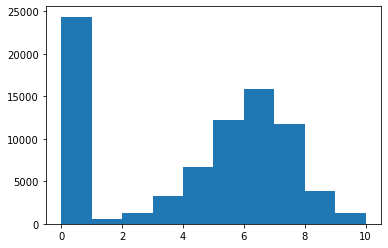

In [27]:
plt.hist(data['average_rating'])
plt.show

In [28]:
print(data[data['average_rating']==0].iloc[0])
print(data[data['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

We will be checking data that have been reviewed at least once and have a reasonable publishing year.

In [29]:
data = data[(data['users_rated']>0) & (data['yearpublished']>0)]

In [30]:
data.shape

(53430, 20)

In [31]:
data.isnull().sum()

id                       0
type                     0
name                    33
yearpublished            0
minplayers               0
maxplayers               0
playingtime              0
minplaytime              0
maxplaytime              0
minage                   0
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [32]:
data = data.dropna(axis=0)

In [33]:
data.shape

(53397, 20)

We dropped the 33 rows that contained NaN values since they were just a minor fraction of the total rows to facilitate our analysis.

Trying to see the correlation between the features.

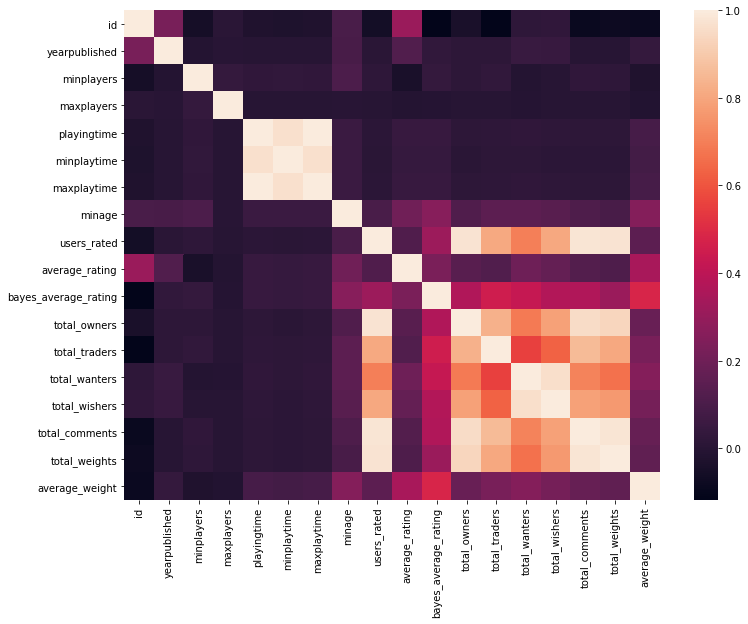

In [34]:
cor = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(cor)
plt.show()

In [35]:
cor

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.223917,-0.054708,0.006391,-0.021438,-0.026197,-0.021438,0.100633,-0.057976,0.314210,-0.117247,-0.039908,-0.113628,0.018971,0.026254,-0.090373,-0.079544,-0.083402
yearpublished,0.223917,1.000000,-0.011934,0.003008,-0.002064,-0.003460,-0.002064,0.092584,0.005051,0.121986,0.030103,0.013726,0.015640,0.050390,0.045050,-0.001575,-0.000174,0.037072
minplayers,-0.054708,-0.011934,1.000000,0.037053,0.024604,0.026989,0.024604,0.108067,0.021128,-0.040254,0.036626,0.015195,0.027252,-0.008637,-0.003761,0.024359,0.019811,-0.024913
maxplayers,0.006391,0.003008,0.037053,1.000000,-0.001069,-0.000992,-0.001069,0.003270,-0.001023,-0.008983,-0.004196,-0.001186,-0.002651,-0.003849,-0.002717,-0.001686,-0.001619,-0.014363
playingtime,-0.021438,-0.002064,0.024604,-0.001069,1.000000,0.966927,1.000000,0.055323,0.010847,0.046472,0.045931,0.014473,0.019367,0.024177,0.020175,0.016920,0.017855,0.089780
minplaytime,-0.026197,-0.003460,0.026989,-0.000992,0.966927,1.000000,0.966927,0.054485,0.005383,0.041214,0.042511,0.008864,0.014551,0.017339,0.012555,0.009998,0.010142,0.083052
maxplaytime,-0.021438,-0.002064,0.024604,-0.001069,1.000000,0.966927,1.000000,0.055323,0.010847,0.046472,0.045931,0.014473,0.019367,0.024177,0.020175,0.016920,0.017855,0.089780
minage,0.100633,0.092584,0.108067,0.003270,0.055323,0.054485,0.055323,1.000000,0.096905,0.204222,0.263279,0.117316,0.151879,0.153018,0.136609,0.112377,0.096133,0.254776
users_rated,-0.057976,0.005051,0.021128,-0.001023,0.010847,0.005383,0.010847,0.096905,1.000000,0.114222,0.316096,0.977631,0.811028,0.702613,0.805315,0.978828,0.975635,0.149382
average_rating,0.314210,0.121986,-0.040254,-0.008983,0.046472,0.041214,0.046472,0.204222,0.114222,1.000000,0.230973,0.139402,0.118964,0.200103,0.174336,0.125063,0.111130,0.347386


In [54]:
cor.average_rating.sort_values(ascending=False)

average_rating          1.000000
average_weight          0.347386
id                      0.314210
bayes_average_rating    0.230973
minage                  0.204222
total_wanters           0.200103
total_wishers           0.174336
total_owners            0.139402
total_comments          0.125063
yearpublished           0.121986
total_traders           0.118964
users_rated             0.114222
total_weights           0.111130
maxplaytime             0.046472
playingtime             0.046472
minplaytime             0.041214
maxplayers             -0.008983
minplayers             -0.040254
Name: average_rating, dtype: float64

We see that are a few features that are correlated to the average_rating, which will be the target we want to estimate.

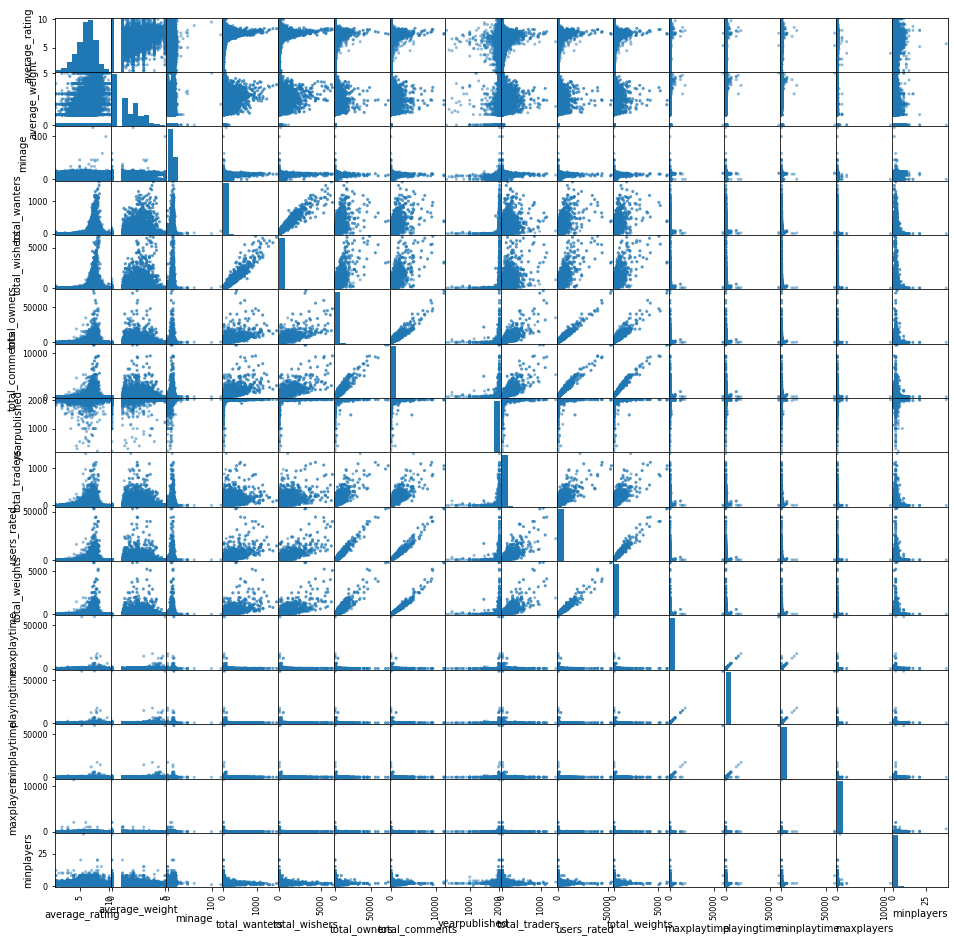

In [61]:
columns_to_plot = ['average_rating','average_weight','minage','total_wanters','total_wishers',
                  'total_owners',
                  'total_comments',
                  'yearpublished',
                  'total_traders',
                  'users_rated',
                  'total_weights',
                  'maxplaytime',
                  'playingtime',
                  'minplaytime',
                  'maxplayers',
                  'minplayers']

data_to_plot = data[columns_to_plot]

pd.plotting.scatter_matrix(data_to_plot, figsize=(16,16));

### Selecting, Visualizing and Splitting the data

We will select the columns that will be meaningful to our analysis. That is we do not need the target, the type,, the bayes_rating, name and id

In [55]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ['bayes_average_rating','average_rating','type','name','id']]

In [38]:
X = data[columns]
y = data['average_rating']

In [39]:
X.shape, y.shape

((53397, 15), (53397,))

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
X_train.shape, X_test.shape

((37377, 15), (16020, 15))

### Training

Starting with a simple linear regression to see where we stand

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
pred = LR.predict(X_test)
error_LR = mean_squared_error(pred, y_test)**0.5

In [88]:
error_LR

1.422351031238023

We continue with a Random forest regressor to see how that performs

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
RF = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state=42 )
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
pred_RF = RF.predict(X_test)
error_RF = mean_squared_error(y_test, pred_RF)**0.5

In [76]:
error_RF

1.1872214244876444

We see that with a Random Forest Regressor, on average we are off in our predictions by 1.18 points in the rating scale. This can be improved if we preprocess our data further. Let's see the prediction of a sample point.

In [83]:
sample_point = X_test.iloc[0]
sample_point_target = y_test.iloc[0]

In [84]:
sample_point

yearpublished     2015.0000
minplayers           2.0000
maxplayers           4.0000
playingtime         15.0000
minplaytime         10.0000
maxplaytime         15.0000
minage              13.0000
users_rated        734.0000
total_owners      1609.0000
total_traders       35.0000
total_wanters       62.0000
total_wishers      243.0000
total_comments     206.0000
total_weights       66.0000
average_weight       1.3788
Name: 2983, dtype: float64

In [85]:
sample_point_target

6.96643

In [86]:
pred_sample = RF.predict(sample_point.values.reshape(1,-1))
pred_sample

array([7.06834093])

We see that the prediction is not far off for this sample.

### Improving the predictions